In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

IMPORTING THE HEART DISEASE DATASET: CLEVELAND DATASET IS USED HERE.

In [8]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

Exploratory Data Analysis:

In [9]:
heart_data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Meaning of the columns in the dataset:

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) I'm going to take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

In [10]:
# print last 5 rows of the dataset
heart_data.tail(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Statistical Measures of Data:

In [11]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

Heart Disease according to sex:

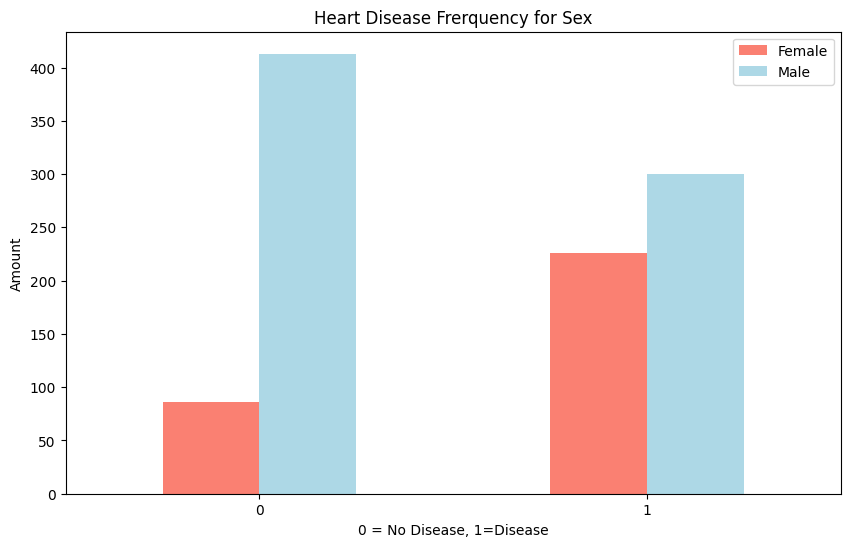

In [14]:
#Create plot of crosstab
pd.crosstab(heart_data.target, heart_data.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

Heart Disease Frequency per Chest Pain Type
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

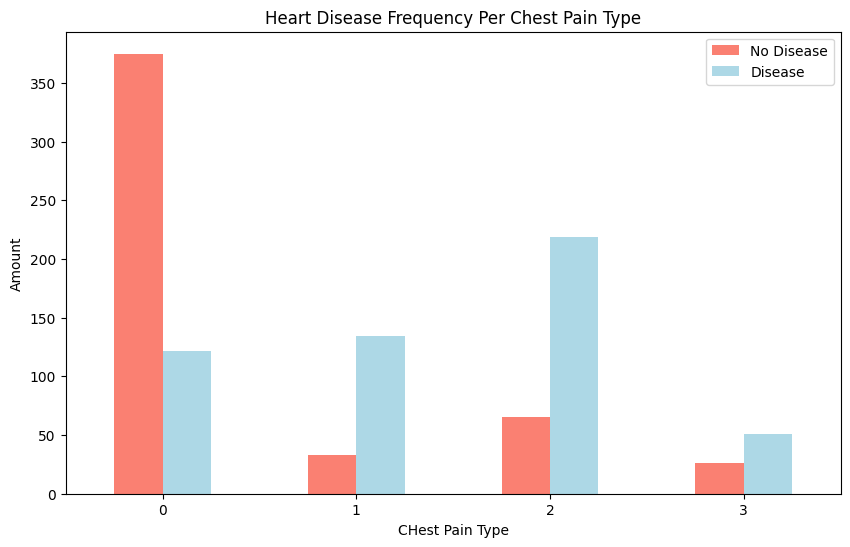

In [15]:
# Make corsstab visualise
pd.crosstab(heart_data.cp,heart_data.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("CHest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

Correlation among features:

(14.5, -0.5)

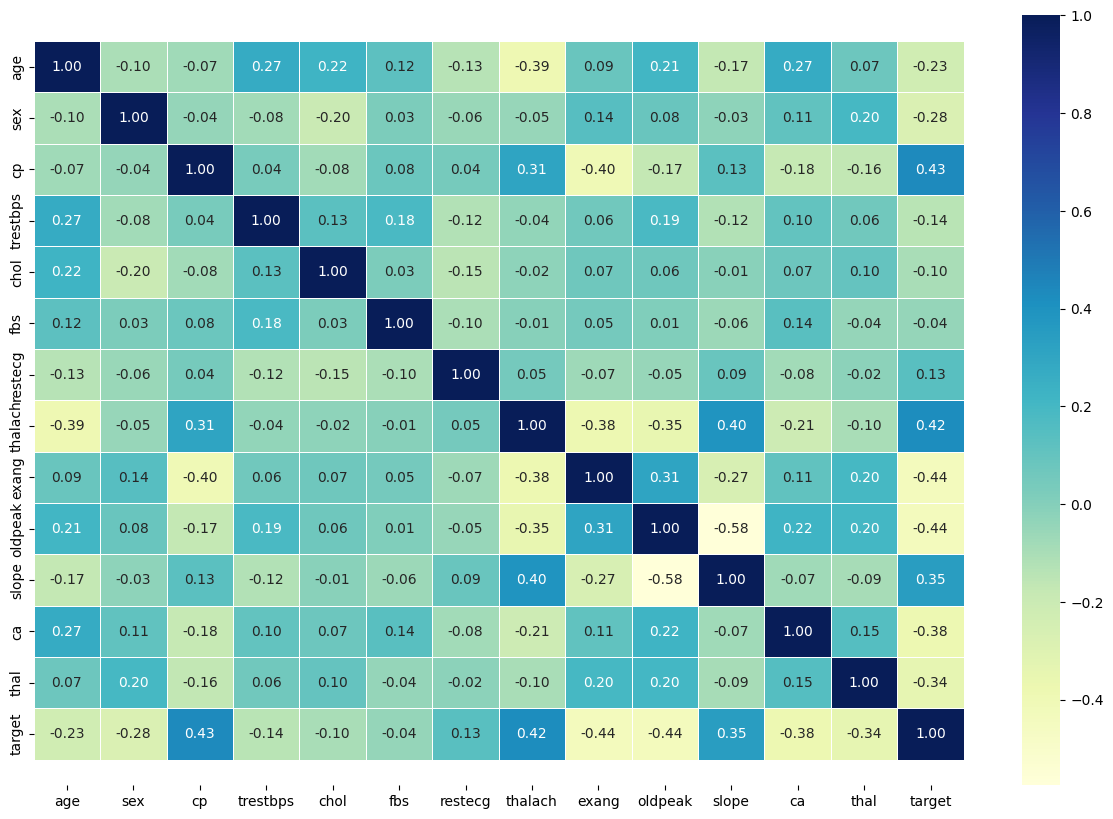

In [16]:
#Visualise correlation
corr_matrix = heart_data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

##  Age vs. Max Heart Rate for Heart Disease

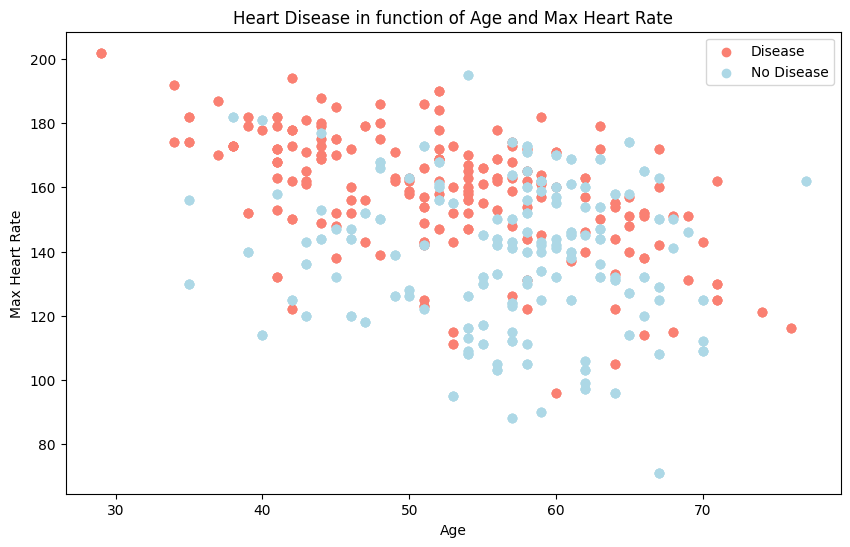

In [17]:
#Create new figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(heart_data.age[heart_data.target==1],
           heart_data.thalach[heart_data.target==1],
           c="salmon")

#Scatter with negative examples
plt.scatter(heart_data.age[heart_data.target==0],
           heart_data.thalach[heart_data.target==0],
           c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

Preparing the dataset:
* Splitting the dataset into X,Y where Y will be the target
* Dividing the dataset into training and test dataset.

In [18]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

size of train: 80% and test: 20%

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


## **ML models**

 Different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


**All Models used without feature selection**

In [21]:
#Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
          "Decision Tree":DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6),
          "Naive Bayes":GaussianNB(),
          "Extreme Gradient Boost":XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
          "Support Vector Classifier":SVC(kernel='rbf', C=2)}

#Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #dictionary to keep model scores
    model_scores = {}
    #loop thru models
    for name, model in models.items():
        #fit model
        model.fit(X_train, Y_train)
        #evaluate model and append score
        model_scores[name]=model.score(X_test, Y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

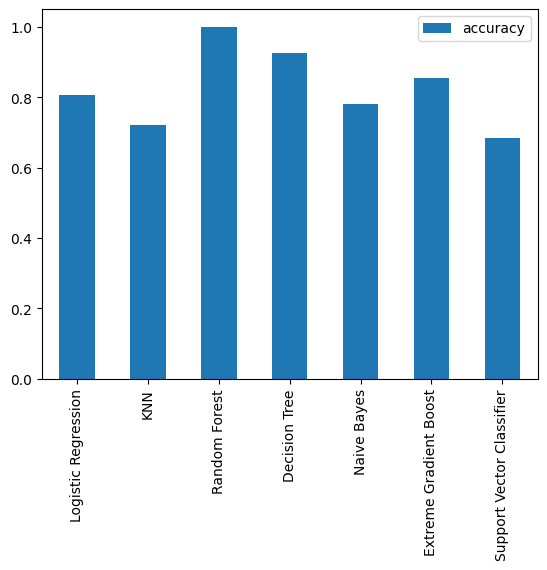

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

**Exhaustive Feauture Selection**
* Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
efs = EFS(lr,
          min_features=1,
          max_features=5,
          scoring='accuracy',
          cv=10)

efs.fit(X_train, Y_train)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [35]:
print('Best subset:', efs.best_idx_)

In [36]:
X_train_efs_lr = efs.transform(X_train)
X_test_efs_lr = efs.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
lr.fit(X_train_efs_lr, Y_train)
y_pred = lr.predict(X_test_efs_lr)

# Compute the accuracy of the prediction
acc = float((Y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc*100))

In [37]:
X_train_efs_lr = efs.transform(X_train)
X_test_efs_lr = efs.transform(X_test)
print(X_train_efs_lr)

In [38]:
lr.fit(X_train_efs_lr, Y_train)

In [39]:
X_train_prediction = lr.predict(X_train_efs_lr)


In [40]:
acc = float((Y_train == X_train_prediction ).sum()) / X_train_prediction.shape[0]
print('Test set accuracy: %.2f %%' % (acc*100))

With a minimum of 1 feature and maximum of 5 features we got a train acuuracy of 84.63% and test accuracy of 84.39%. The Best subset: (1, 2, 8, 9, 11).

**Exhaustive Feature selector**
 * KNN


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
efs1 = EFS(knn,
           min_features=1,
           max_features=10,
           scoring='accuracy',
           cv=5)
efs1 = efs1.fit(X_train, Y_train)

In [43]:
print('Selected features:', efs1.best_idx_)

Selected features: None


In [ ]:
X_train_efs_knn1 = efs1.transform(X_train)
X_test_efs_knn1 = efs1.transform(X_test)

In [ ]:
knn.fit(X_train_efs_knn1, Y_train)
y_pred_test = knn.predict(X_test_efs_knn1)
y_pred_train = knn.predict(X_train_efs_knn1)

In [ ]:
# Compute the accuracy of the prediction
acc_test = float((Y_test == y_pred_test).sum()) / y_pred_test.shape[0]
print('Test set accuracy: %.2f %%' % (acc_test*100))
acc_train = float((Y_train == y_pred_train).sum()) / y_pred_train.shape[0]
print('Train set accuracy: %.2f %%' % (acc_train*100))

Using a min of 1 feature and maximum of 10 feature we got a subset of Selected features: (2, 5, 6, 8, 10, 11, 12) and the test accuracy is 87.80% and a train set accuracy of 90.49%.

In [ ]:
efs2 = EFS(knn,
           min_features=1,
           max_features=8,
           scoring='accuracy',
           cv=5)
efs2 = efs2.fit(X_train, Y_train)

In [ ]:
print('Selected features:', efs2.best_idx_)

Using a min of 1 feature and maximum of 8 feature we got a subset of Selected features: (2, 5, 6, 8, 10, 11, 12) and the test accuracy is 87.80% and a train set accuracy of 90.49%.

In [ ]:
efs3 = EFS(knn,
           min_features=1,
           max_features=13,
           scoring='accuracy',
           cv=10)
efs3 = efs3.fit(X_train, Y_train)

In [ ]:
print('Selected features:', efs3.best_idx_)

In [ ]:
X_train_efs_knn2 = efs3.transform(X_train)
X_test_efs_knn2 = efs3.transform(X_test)
knn.fit(X_train_efs_knn2, Y_train)
y_pred_test2 = knn.predict(X_test_efs_knn2)
y_pred_train2 = knn.predict(X_train_efs_knn2)
# Compute the accuracy of the prediction
acc_test2 = float((Y_test == y_pred_test2).sum()) / y_pred_test2.shape[0]
print('Test set accuracy: %.2f %%' % (acc_test2*100))
acc_train2 = float((Y_train == y_pred_train2).sum()) / y_pred_train2.shape[0]
print('Train set accuracy: %.2f %%' % (acc_train2*100))


Using a min of 1 feature and maximum of 13 feature we got a subset of Selected features: (2, 5, 6, 8, 10, 11, 12) and the test accuracy is 87.80% and a train set accuracy of 90.49%.

In [ ]:
efs4 = EFS(knn,
           min_features=1,
           max_features=5,
           scoring='accuracy',
           cv=10)
efs4 = efs4.fit(X_train, Y_train)

In [ ]:
print('Selected features:', efs4.best_idx_)


In [ ]:
X_train_efs_knn3 = efs4.transform(X_train)
X_test_efs_knn3 = efs4.transform(X_test)
knn.fit(X_train_efs_knn3, Y_train)
y_pred_test3 = knn.predict(X_test_efs_knn3)
y_pred_train3 = knn.predict(X_train_efs_knn3)
# Compute the accuracy of the prediction
acc_test3 = float((Y_test == y_pred_test3).sum()) / y_pred_test3.shape[0]
print('Test set accuracy: %.2f %%' % (acc_test3*100))
acc_train3 = float((Y_train == y_pred_train3).sum()) / y_pred_train3.shape[0]
print('Train set accuracy: %.2f %%' % (acc_train3*100))


Using a min of 1 feature and maximum of 5 feature we got a subset of Selected features: (2, 6, 10, 11, 12) and the test accuracy is 85.37% and a train set accuracy of 87.68%.

**Using RandomForest**

In [25]:
import pandas as pd

from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

In [ ]:
sel.get_support()

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
print(selected_feat)

RECURSIVE FEATURE SELECTION IN RANDON FOREST:


In [26]:
from sklearn.feature_selection import RFECV

In [27]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)

In [28]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [29]:
# Predict the Test set results

y_pred_rf = rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_rf)))

Model accuracy score with 100 decision-trees : 1.0000


In [31]:
# view the feature scores

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

cp          0.136646
thal        0.122694
oldpeak     0.111406
ca          0.109095
thalach     0.109080
age         0.086420
chol        0.081858
trestbps    0.072875
exang       0.064705
slope       0.045622
sex         0.033894
restecg     0.017076
fbs         0.008630
dtype: float64

FEATURE IMPORTANCE SCORE:

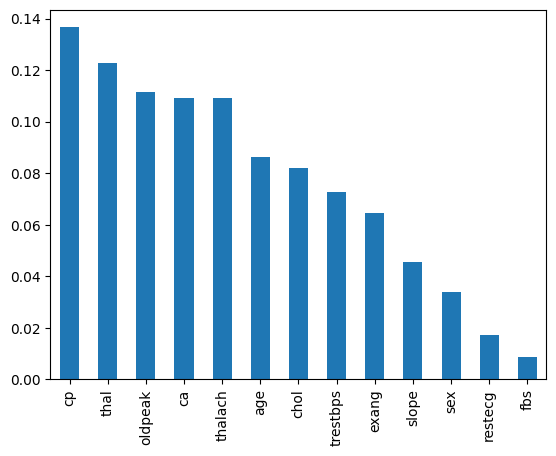

In [32]:
feature_scores.plot(kind='bar');

In [44]:
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train,Y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=0),
      scoring='neg_mean_squared_error')

In [47]:
rfe.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [48]:
selected_feat= X_train.columns[(rfe.get_support())]
len(selected_feat)

13

In [49]:
print(selected_feat)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [50]:
rfe1 = RFECV(rf,cv=10,scoring="accuracy")

rfe1.fit(X_train,Y_train)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

In [51]:
rfe1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Recursive Feature Elimination:

In [52]:
from sklearn.feature_selection import RFE

In [54]:
selector = RFE(rf, n_features_to_select=5, step=1)
selector.fit(X_train, Y_train)

print(selector.support_)

print(selector.ranking_)

[ True False  True False False False False  True False  True False False
  True]
[1 7 1 4 3 9 8 1 5 1 6 2 1]


In [56]:
selector1= RFE(rf, n_features_to_select=10, step=1)
selector1.fit(X_train, Y_train)

print(selector1.support_)

print(selector1.ranking_)

[ True False  True  True  True False False  True  True  True  True  True
  True]
[1 2 1 1 1 4 3 1 1 1 1 1 1]


In [57]:
selector2 = RFE(rf, n_features_to_select=8, step=1)
selector2.fit(X_train, Y_train)

print(selector2.support_)

print(selector2.ranking_)

[ True False  True  True  True False False  True False  True False  True
  True]
[1 4 1 1 1 6 5 1 2 1 3 1 1]
